In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1- Import Data

Load the training data first, then check the data format

In [2]:
train_data = pd.read_csv('C:\\Users\\info\\Downloads\\Titanic-Survival-prediction-main\\Titanic-Survival-prediction-main\\data\\train.csv')
data_test = pd.read_csv('C:\\Users\\info\\Downloads\\Titanic-Survival-prediction-main\\Titanic-Survival-prediction-main\\data\\test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Display shape
train_data.shape

(891, 12)

In [11]:
data_test.shape

(418, 11)

In [3]:
train_data.info()
print('-'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [12]:
#Checking for Null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [14]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#Description of dataset
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,U0,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
# Assuming you have already filled missing values in your dataset

# Select only numerical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns

# Group by 'Survived' and calculate the mean for numerical columns
grouped_data = train_data.groupby('Survived')[numerical_columns].mean()

# Display the grouped mean values
print(grouped_data)


          PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Survived                                                                   
0          447.016393       0.0  2.531876  30.626179  0.553734  0.329690   
1          444.368421       1.0  1.950292  28.343690  0.473684  0.464912   

               Fare  
Survived             
0         22.117887  
1         48.395408  


<Axes: ylabel='Survived'>

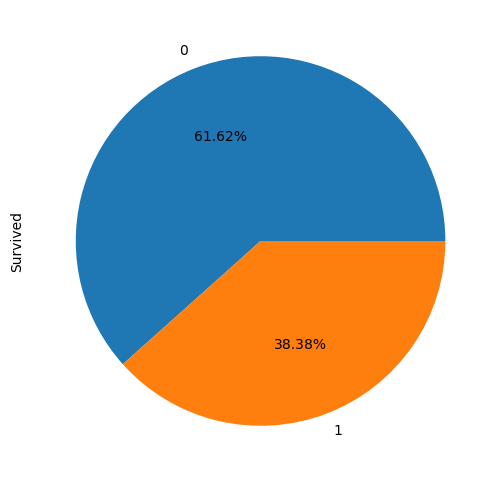

In [18]:
# First look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

### 2-Missing value processing




In [19]:
# Identify the rows where 'Embarked' is null
null_embarked_rows = train_data['Embarked'].isnull()

# Find the mode of the non-null values in 'Embarked'
mode_embarked = train_data['Embarked'].dropna().mode().values[0]

# Set the null values in 'Embarked' to the mode using loc
train_data.loc[null_embarked_rows, 'Embarked'] = mode_embarked


For categorical attributes, consider assigning a placeholder value to denote absence, like 'U0'. This is because the lack of information itself might carry implicit meaning. For instance, the absence of a value in the 'Cabin' attribute could imply the absence of a cabin.

In [20]:
train_data['Cabin'] = train_data['Cabin'].fillna('U0') 

Employ models such as regression or Random Forest to estimate the values of missing attributes. Given the significance of Age as a feature in this dataset, a high degree of accuracy in filling the missing values is crucial, as it can substantially influence the outcomes. Typically, entries with complete data serve as the training set for the model, aiding in predicting the missing values. In this specific dataset, the random forest prediction model is utilized, with numerical attributes selected as features. This choice is made because sklearn's model can exclusively handle numerical attributes. While only numerical features are initially selected here, it's important to note that in practical applications, non-numerical features would need to be converted to numerical features.


In [21]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [22]:
# Next, look at the complementary data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3-Preliminary data analysis

#### 3-1-The relationship between gender and survival or not (Sex)

In [23]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

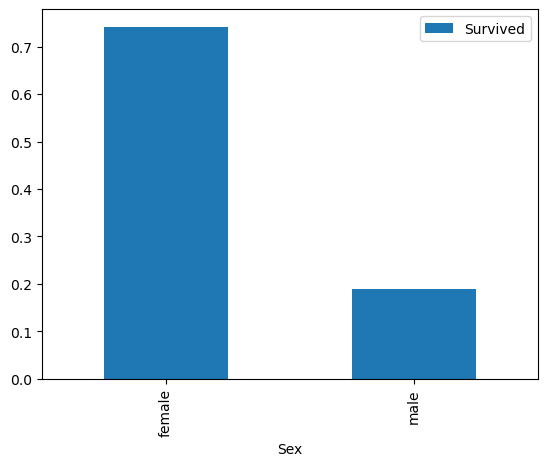

In [24]:
survived_by_sex = train_data[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

The above is the survival rate of different genders, which can be seen in the Titanic accident, or reflect the Lady First.

#### 3-2-The relationship between cabin class and survival or not Pclass

In [25]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

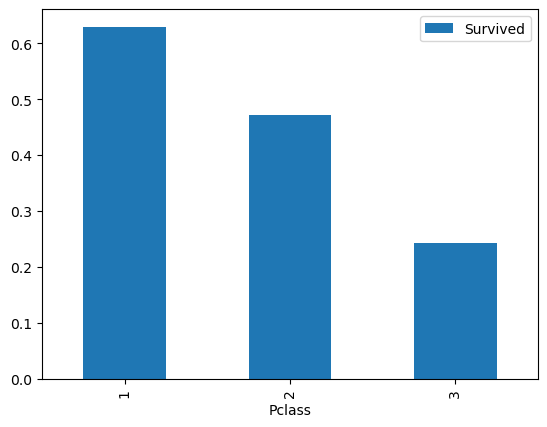

In [26]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [27]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass,Sex'>

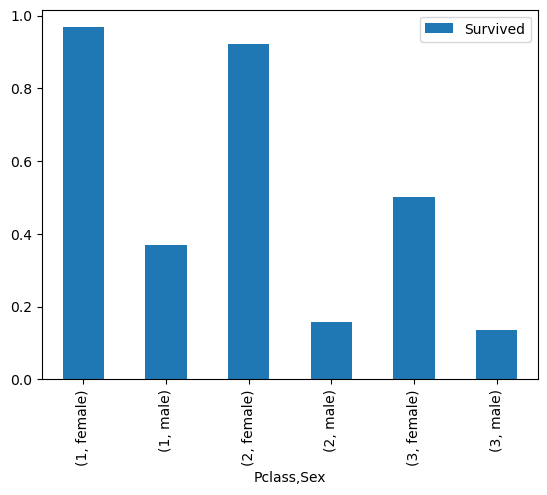

In [28]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

### 3-3 The relationship between age and survival

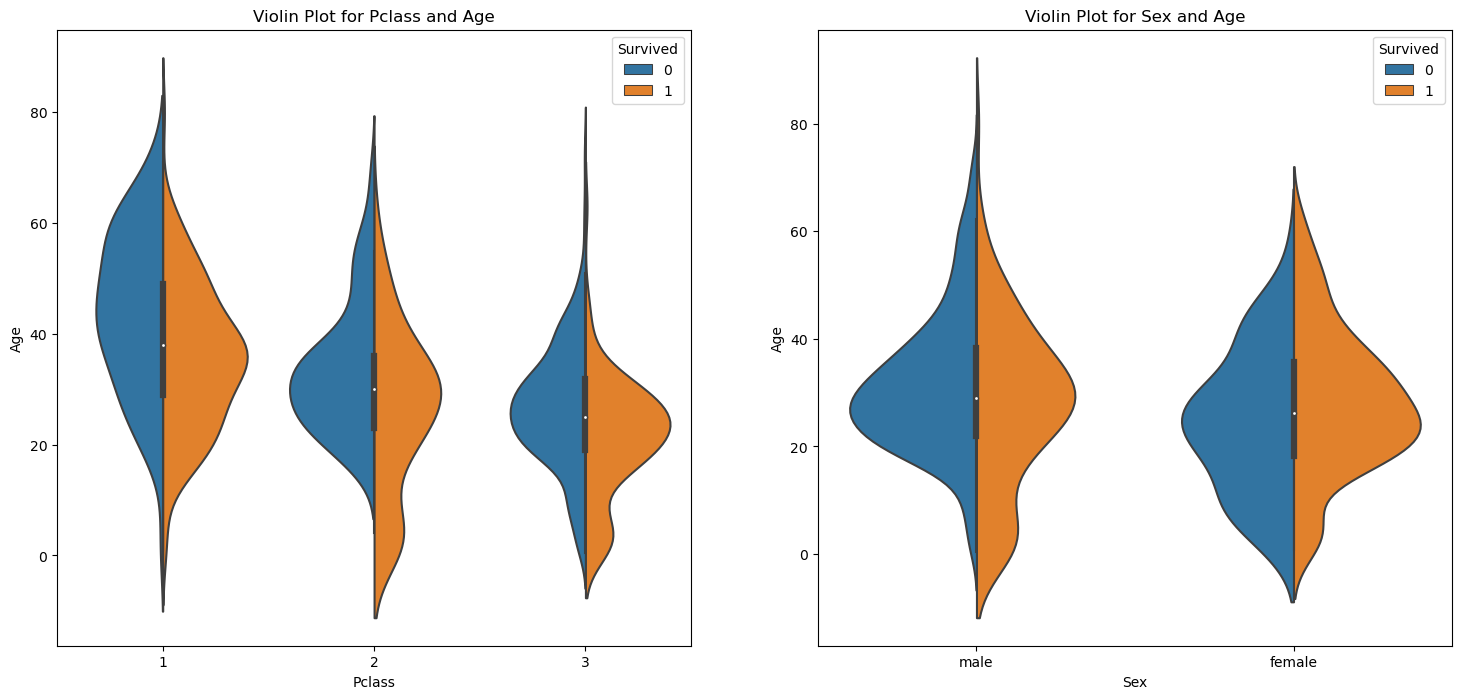

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Violin plot for 'Pclass' and 'Age'
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Violin Plot for Pclass and Age')

# Violin plot for 'Sex' and 'Age'
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Violin Plot for Sex and Age')

plt.show()


Analysis of the overall age distribution.

<Axes: >

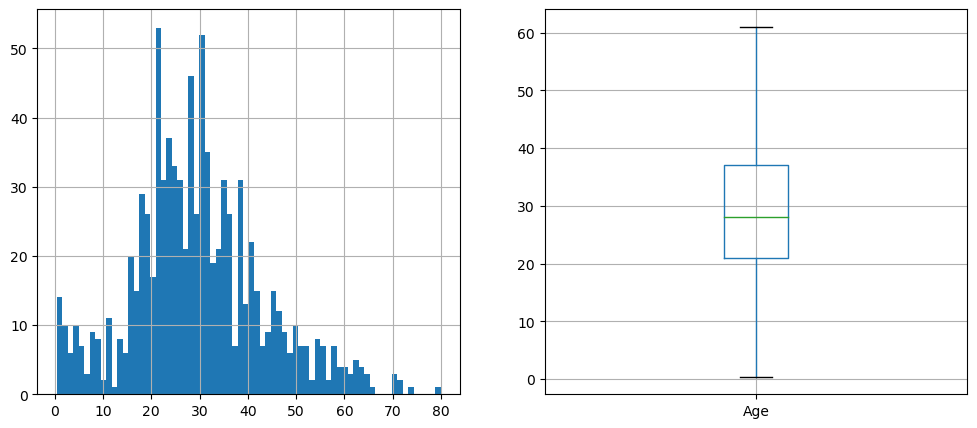

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)

Distribution of survival and non-survival at different ages.

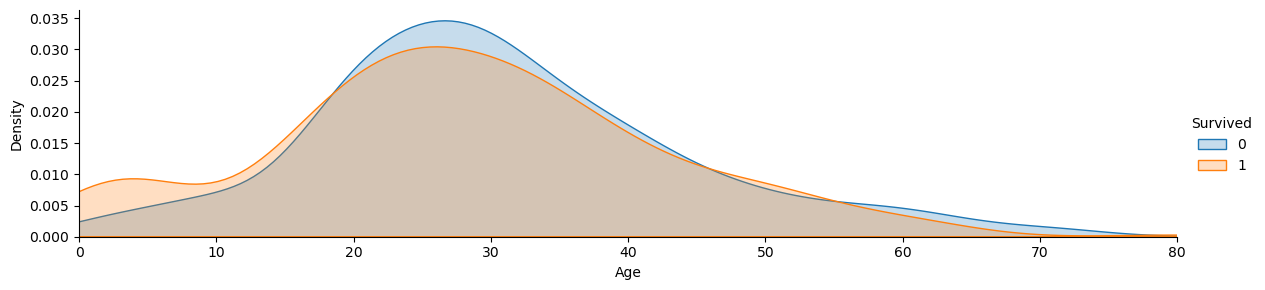

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

plt.show()


In [34]:
#Droping Useless Columns
train_data = train_data.drop(['Ticket'], axis = 1)
data_test = data_test.drop(['Ticket'], axis = 1)

In [35]:
train_data = train_data.drop(['Cabin'], axis = 1)
data_test = data_test.drop(['Cabin'], axis = 1)

In [36]:
train_data = train_data.drop(['Name'], axis = 1)
data_test = data_test.drop(['Name'], axis = 1)

In [37]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train_data[column_train]
#target value
Y=train_data['Survived']

In [38]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

0

## Split the data

In [44]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid SettingWithCopyWarning
X_encoded = train_data[column_train].copy()

# Label encoding for categorical columns
le = LabelEncoder()
X_encoded['Sex'] = le.fit_transform(X_encoded['Sex'])
X_encoded['Embarked'] = le.fit_transform(X_encoded['Embarked'])

# Now you can use X_encoded in your model


## Model Building

## Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the columns for numerical and categorical features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the logistic regression model
best_logreg = grid_search.best_estimator_

# Predict the labels for the test set
Y_pred = best_logreg.predict(X_test)

# Generate and print the classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[89 16]
 [21 53]]


#### Confusion matrix

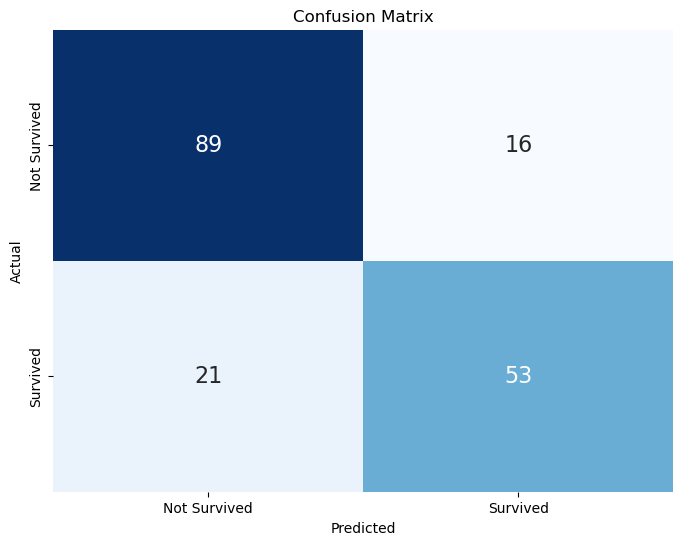

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fit the model to the training data
best_logreg.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = best_logreg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Roc curve

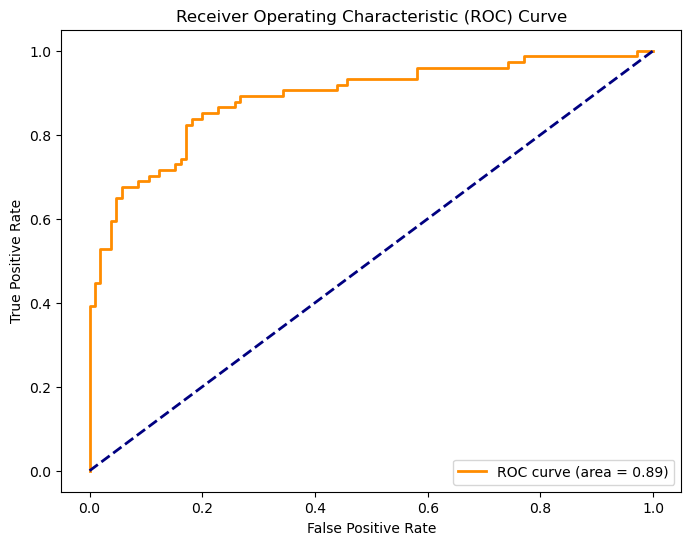

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
Y_prob = best_logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with the preprocessor and Random Forest classifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_rf.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Get the best Random Forest model from the grid search
best_rf = grid_search_rf.best_estimator_

# Predictions on the test set
Y_pred_rf = best_rf.predict(X_test)

# Classification Report
classification_report_rf = classification_report(Y_test, Y_pred_rf)

# Confusion Matrix
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

best_params_rf, classification_report_rf, confusion_matrix_rf


({'classifier__max_depth': 10,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 2,
  'classifier__n_estimators': 150},
 '              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       105\n           1       0.84      0.73      0.78        74\n\n    accuracy                           0.83       179\n   macro avg       0.83      0.82      0.82       179\nweighted avg       0.83      0.83      0.83       179\n',
 array([[95, 10],
        [20, 54]], dtype=int64))

#### Confusion matrix

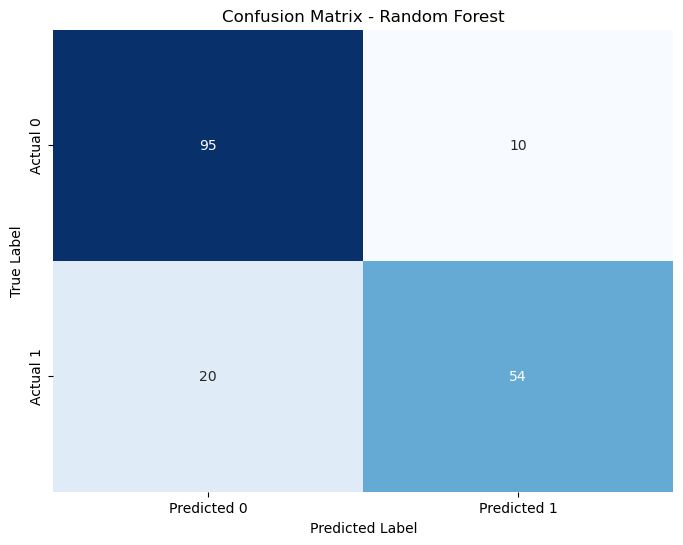

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Roc curve

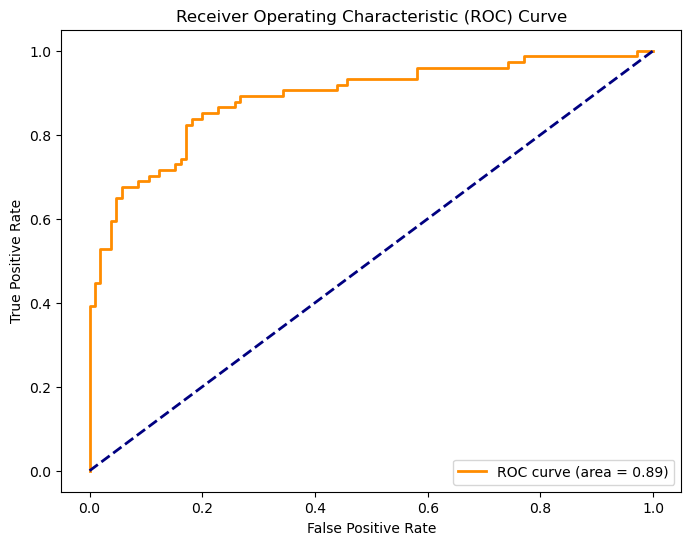

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_probs_rf = grid_search_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
